In [ ]:
# 2014-04-16

In [1]:
from PIL import Image
import scipy.ndimage as spimg
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
zebra_color = Image.open("data/zebra/zebra1.jpg")
zebra = np.array(zebra_color.convert(mode='L'))

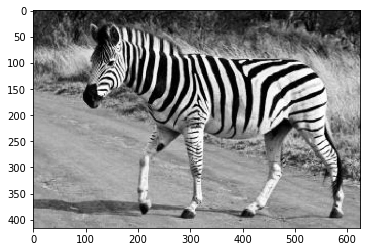

In [3]:
plt.imshow(zebra, cmap='gray')

In [4]:
fzebra = np.fft.fftshift(np.fft.fft2(zebra))
width, height = fzebra.shape

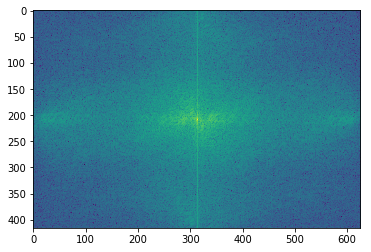

In [5]:
plt.imshow(np.log(np.abs(fzebra)))

In [6]:
def inverse_with_mask(transformed, mask_function):
    mask = np.fromfunction(mask_function, transformed.shape)
    masked = transformed * mask
    inverted = np.fft.ifft2(masked)
    return np.abs(inverted)

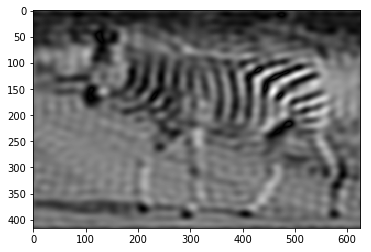

In [7]:
def center_mask(x, y):
    return (x - width / 2) ** 2 + (y - height / 2) ** 2 < 600

plt.imshow(inverse_with_mask(fzebra, center_mask), cmap='gray')

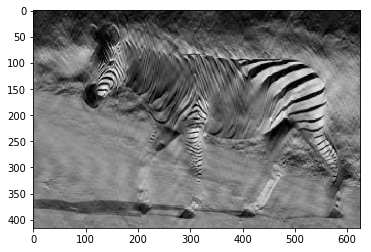

In [8]:
def combined_mask(x, y):
    x_dist = (x - width / 2) ** 2
    y_dist = (y - height / 2) ** 2
    return (y_dist < 300) | (x_dist > 200)

plt.imshow(inverse_with_mask(fzebra, combined_mask), cmap='gray')

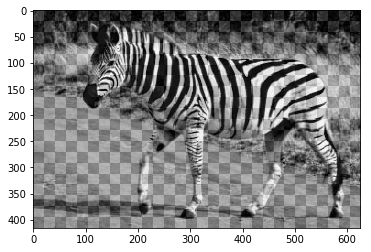

In [9]:
def angle_mask(x, y):
    x0, y0 = 0, 1
    cosine = ((x - width / 2) * x0 + (y - height / 2) * y0) / np.sqrt(0.001 + x*x + y*y)
    return ((cosine + 1.01)/2)

plt.imshow(inverse_with_mask(fzebra, angle_mask), cmap='gray')

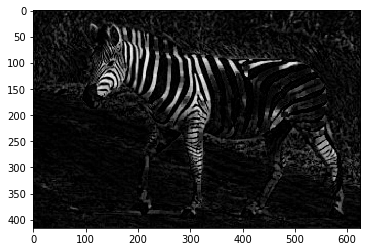

In [10]:
plt.imshow(spimg.morphology.white_tophat(zebra, 9), cmap='gray')